## Lab 3 : ECE 8410 : Computer Vision: 

### Aniruddha Das 201715695

## Importing Libraries

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [11]:
Limg = Image.open('./cones-png-2/cones/im2.png').convert('L')
Rimg = Image.open('./cones-png-2/cones/im6.png').convert('L')

#### Displaying B/W test pictures 'Left' and 'Right'

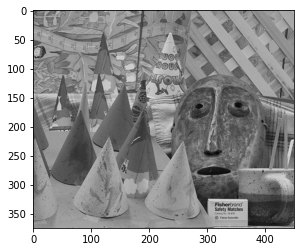

In [3]:
plt.imshow(Limg, cmap='gray', vmin=0, vmax=255)

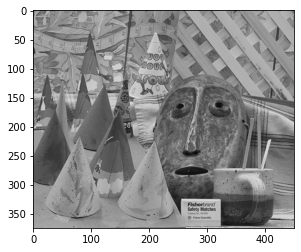

In [4]:
plt.imshow(Rimg, cmap='gray', vmin=0, vmax=255)

#### Obtaining Image Height and Width

In [12]:
W, H = Limg.size

In [6]:
print(f"Height is: {H}")
print(f"Width is: {W}")

Height is: 375
Width is: 450


## Function to Obtain Depth Match

<p>kernel = local search kernel, kernel X kernel<br>
offset = pixel search range<\br>

In [6]:
def stereo_match(limg, rimg, kernel, offset):
    left = np.asarray(limg)
    right = np.asarray(rimg)
    nimg = np.zeros((H, W), np.uint8)
    k_h = int(kernel/2)
    offsetadjustval = 255/offset
    
    for y in range(k_h, H-k_h):
        for x in range(k_h, W-k_h):
            
            bestval = 0
            prev_sse = 65534
            
            for o in range(offset):
                sse = 0
                sse_t = 0
                
                for v in range(-k_h, k_h):
                    for u in range(-k_h, k_h):
                        
                        sse_t = int(left[y+v, x+u]) - int(right[y+v, (x+u)-o])
                        sse = sse + (sse_t ** 2)
                        
                if (sse < prev_sse):
                    prev_sse = sse
                    bestval = o
                
                nimg[y][x] = bestval * offsetadjustval
                
    return nimg

## Displaying Results

#### Initializing parameters

In [8]:
k = 6
offs = 30

#### Obtaining and Plotting Depth Map

In [9]:
groundtruthdepthmap = stereo_match(Limg, Rimg, k, offs)

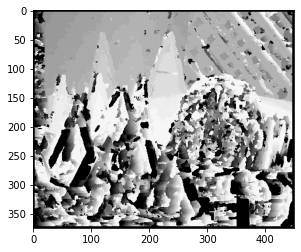

In [10]:
plt.imshow(groundtruthdepthmap, cmap='gray', vmin=0, vmax=255)

## Displcaement Plot Comaparison

In [2]:
LDPimg = Image.open('./cones-png-2/cones/disp2.png').convert('L')
RDPimg = Image.open('./cones-png-2/cones/disp6.png').convert('L')

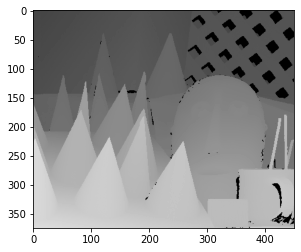

In [3]:
plt.imshow(LDPimg, cmap='gray', vmin=0, vmax=255)

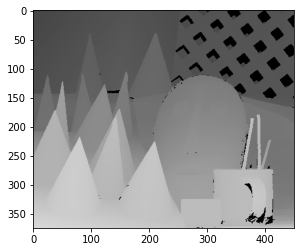

In [4]:
plt.imshow(RDPimg, cmap='gray', vmin=0, vmax=255)

In [13]:
dispdepthmap = stereo_match(LDPimg, RDPimg, k, offs)

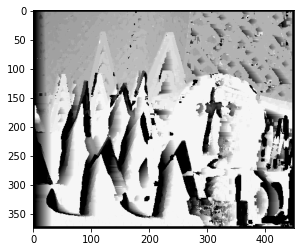

In [14]:
plt.imshow(dispdepthmap, cmap='gray', vmin=0, vmax=255)